In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [8]:
plt.rc('font', size=22) #controls default text size
plt.rc('axes', titlesize=22) #fontsize of the title
plt.rc('axes', labelsize=22) #fontsize of the x and y labels
plt.rc('xtick', labelsize=22) #fontsize of the x tick labels
plt.rc('ytick', labelsize=22) #fontsize of the y tick labels
plt.rc('legend', fontsize=22) #fontsize of the legend

In [3]:
plt.style.use('fast')

In [9]:
plt.rcParams['figure.figsize'] = [10, 7]

In [5]:
data = pd.read_csv('extracted_features.csv')

In [6]:
data.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,winner_id,winner_name,winner_hand,winner_ht,winner_age,loser_id,loser_name,loser_hand,loser_ht,loser_age,score,best_of,round,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,loser_rank,index,winner_tournaments_won,loser_tournaments_won,winner_aces,winner_double_faults,winner_first_serve_in,winner_first_serve_won,winner_second_serve_won,loser_aces,loser_double_faults,loser_first_serve_in,loser_first_serve_won,loser_second_serve_won,winner_games_won,loser_games_won,winner_games_played,loser_games_played,winner_games_round_won,loser_games_round_won,winner_games_tourney_won,loser_games_tourney_won,winner_games_surface_won,loser_games_surface_won,winner_games_opponent_won,loser_games_opponent_won,winner_games_hand_won,loser_games_hand_won,winner_break_points_saved,loser_break_points_saved,winner_break_points_converted,loser_break_points_converted,winner_first_serve_return_won,winner_second_serve_return_won,loser_first_serve_return_won,loser_second_serve_return_won,year,winner_elo,loser_elo,proba_elo,winner_glicko,loser_glicko,winner_RD,loser_RD,winner_matches_won,loser_matches_won,winner_matches_lost,loser_matches_lost,winner_consecutive_matches_won,loser_consecutive_matches_won,winner_consecutive_matches_lost,loser_consecutive_matches_lost,winner_weeks_inactive,loser_weeks_inactive,winner_games_played_last_weeks,loser_games_played_last_weeks,winner_tiebreaks_won_year,loser_tiebreaks_won_year,winner_home,loser_home
0,1992-301,Auckland,Hard,32,Other,19920106,101797,Jacco Eltingh,R,188.0,21.3,101120,Karel Novacek,R,190.0,26.7,7-6 7-6,3,R32,6.0,4.0,78.0,44.0,39.0,22.0,12.0,2.0,2.0,7.0,2.0,92.0,50.0,40.0,24.0,12.0,4.0,4.0,110.0,8.0,76285,0,7,0.086037,0.042666,0.608604,0.692352,0.475676,0.069455,0.033623,0.564325,0.727273,0.515942,0.445652,0.531766,920.0,1999.0,0.445455,0.515780,0.000000,0.529412,0.422604,0.482105,0.000000,0.000000,0.476813,0.516833,0.566308,0.630975,0.333333,0.426644,0.265222,0.467049,0.310444,0.512026,1992,1492.143440,1883.772450,0.094971,1703.326523,2057.531359,80.648832,60.056906,14,158,28,128,0,0,12,4,1,7,20.0,0.0,0.583333,0.571429,0,0
1,1992-338,Sydney Outdoor,Hard,32,Other,19920106,101889,Todd Woodbridge,R,178.0,20.7,101529,Michael Stich,R,193.0,23.2,4-6 6-1 6-1,3,R32,4.0,5.0,70.0,40.0,28.0,14.0,12.0,2.0,5.0,8.0,4.0,71.0,41.0,20.0,13.0,12.0,3.0,10.0,80.0,4.0,76286,0,5,0.025649,0.046771,0.602293,0.668337,0.496206,0.083055,0.039300,0.583930,0.758311,0.557553,0.498185,0.557871,1102.0,2255.0,0.483019,0.535828,0.367347,0.555556,0.503173,0.550479,0.333333,0.666667,0.490826,0.543283,0.563467,0.689487,0.413249,0.412892,0.297468,0.530738,0.316658,0.470344,1992,1750.186463,2054.554908,0.147784,1912.885802,2172.543768,67.346775,59.535010,45,107,54,58,0,0,1,1,3,3,0.0,0.0,0.500000,0.613636,1,0
2,1992-301,Auckland,Hard,32,Other,19920106,101205,Grant Connell,L,185.0,26.1,101767,Lars Jonsson,R,188.0,21.5,6-3 6-4,3,R32,7.0,0.0,57.0,36.0,28.0,14.0,10.0,2.0,3.0,0.0,1.0,71.0,58.0,28.0,10.0,9.0,5.0,8.0,78.0,101.0,76287,0,0,0.063127,0.035693,0.582596,0.710380,0.506714,0.031285,0.020112,0.707635,0.623684,0.482803,0.490269,0.497531,1079.0,810.0,0.501502,0.504212,0.520231,0.542373,0.492644,0.513344,0.000000,0.000000,0.502387,0.465318,0.663366,0.575862,0.351648,0.453875,0.305192,0.464399,0.328553,0.522593,1992,1722.873014,1716.350299,0.509386,1886.557197,1871.293999,73.317826,71.753235,56,37,73,44,0,0,1,3,9,1,0.0,16.0,0.454545,0.125000,0,0
3,1992-338,Sydney Outdoor,Hard,32,Other,19920106,101404,Thomas Muster,L,180.0,24.2,102304,Grant Doyle,R,180.0,17.9,6-4 6-2,3,R32,5.0,2.0,53.0,28.0,25.0,11.0,9.0,0.0,1.0,1.0,3.0,54.0,22.0,18.0,11.0,9.0,4.0,8.0,37.0,627.0,76288,10,0,0.012874,0.019871,0.735236,0.622764,0.525370,0.038961,0.045455,0.571429,0.647727,0.439394,0.530864,0.404255,1134.0,47.0,0.535517,0.500000,0.000000,0.000000,0.510758,0.404255,0.000000,0.000000,0.541111,0

## EDA

In [29]:
def make_plot(winner, loser, label, dis=False):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    sb.boxplot(data[[winner,loser]], orient="h", ax=ax_box,palette={winner:'green',loser:'blue'}).set(yticklabels=[])

    
    sb.histplot(data[winner],discrete=dis,label='winner',stat='density',bins=40,kde=True,color='green')
    sb.histplot(data[loser],discrete=dis,label='loser',stat='density',bins=40,kde=True,color='blue')
    plt.xlabel(label)
    plt.ylabel("Density")
    plt.legend()
    plt.savefig(r'img\\EDA\\'+label+'.pdf',bbox_inches='tight')

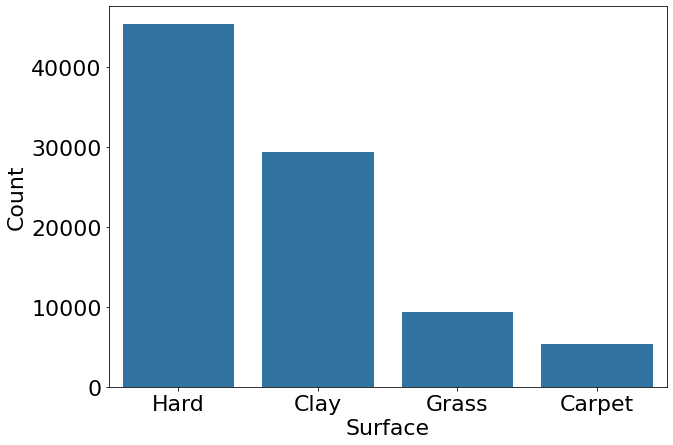

In [43]:
sb.countplot(data, x='surface', order=data['surface'].value_counts().index)
plt.xlabel('Surface')
plt.ylabel("Count")
plt.savefig(r'img\\EDA\\'+'Surface'+'.pdf',bbox_inches='tight')

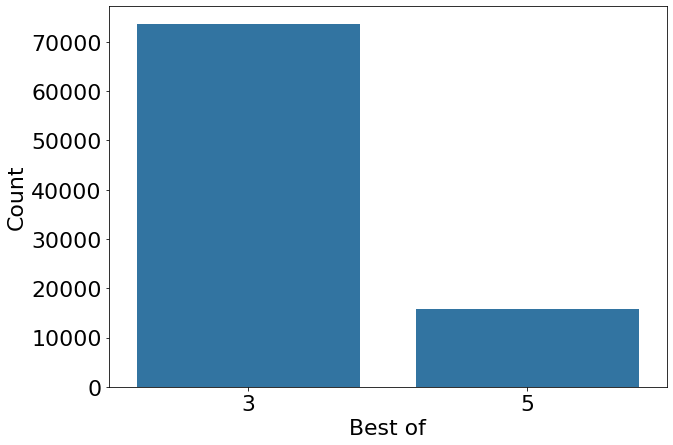

In [44]:
sb.countplot(data, x='best_of', order=data['best_of'].value_counts().index)
plt.xlabel('Best of')
plt.ylabel("Count")
plt.savefig(r'img\\EDA\\'+'Best of'+'.pdf',bbox_inches='tight')

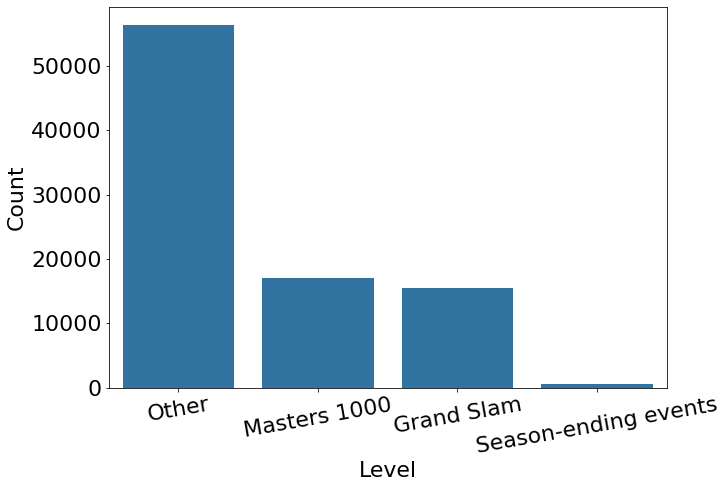

In [45]:
sb.countplot(data, x='tourney_level', order=data['tourney_level'].value_counts().index)
plt.xlabel('Level')
plt.ylabel("Count")
plt.xticks(rotation=10)
plt.savefig(r'img\\EDA\\'+'Level'+'.pdf',bbox_inches='tight')

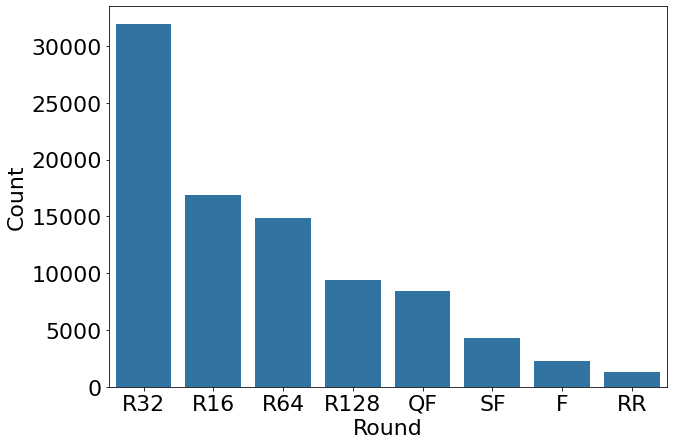

In [46]:
sb.countplot(data, x='round', order=data['round'].value_counts().index)
plt.xlabel('Round')
plt.ylabel("Count")
plt.savefig(r'img\\EDA\\'+'Round'+'.pdf',bbox_inches='tight')

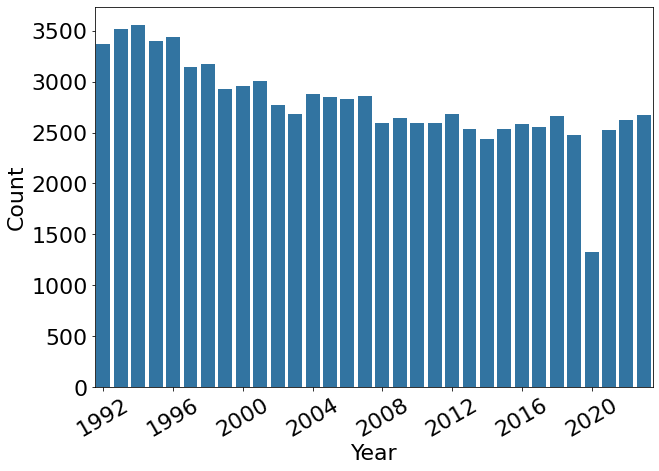

In [19]:
sb.countplot(data, x='year')
plt.xlabel('Year')
plt.ylabel("Count")
plt.xticks([0,4,8,12,16,20,24,28],[1992,1996,2000,2004,2008,2012,2016,2020],rotation=30)
plt.savefig(r'img\\EDA\\'+'Year'+'.pdf',bbox_inches='tight')

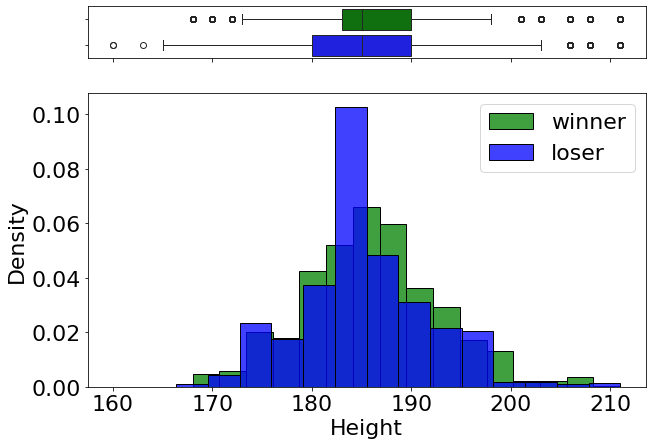

In [35]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sb.boxplot(data[['winner_ht','loser_ht']], orient="h", ax=ax_box,palette={'winner_ht':'green','loser_ht':'blue'}).set(yticklabels=[])


sb.histplot(data['winner_ht'],label='winner',stat='density',bins=16,color='green', ax=ax_hist)
sb.histplot(data['loser_ht'],label='loser',stat='density',bins=16,color='blue', ax=ax_hist)

plt.xlabel('Height')
plt.ylabel("Density")
plt.legend()
ax_box.set(ylabel='')
plt.savefig(r'img\\EDA\\'+'Height'+'.pdf',bbox_inches='tight')

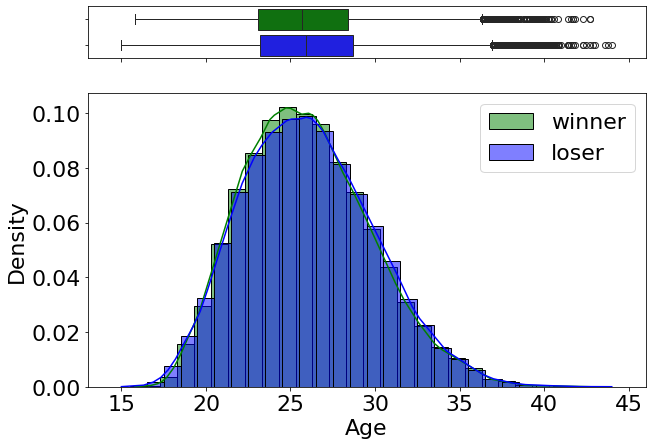

In [36]:
make_plot('winner_age', 'loser_age', 'Age', dis=True)

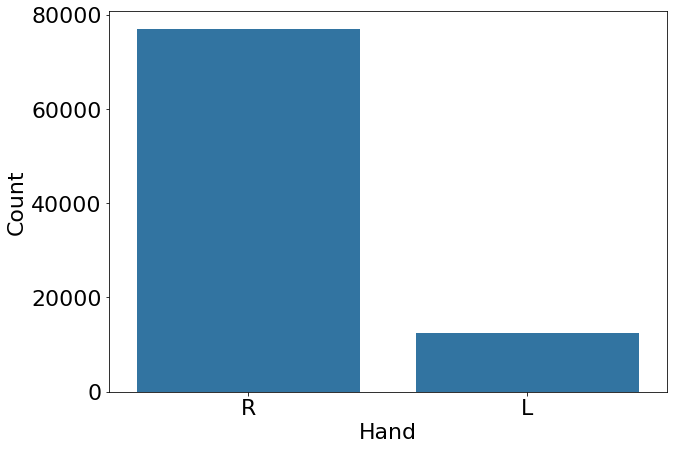

In [48]:
sb.countplot(data, x='winner_hand', order=data['winner_hand'].value_counts().index)
plt.xlabel('Hand')
plt.ylabel("Count")
plt.savefig(r'img\\EDA\\'+'Hand'+'.pdf',bbox_inches='tight')

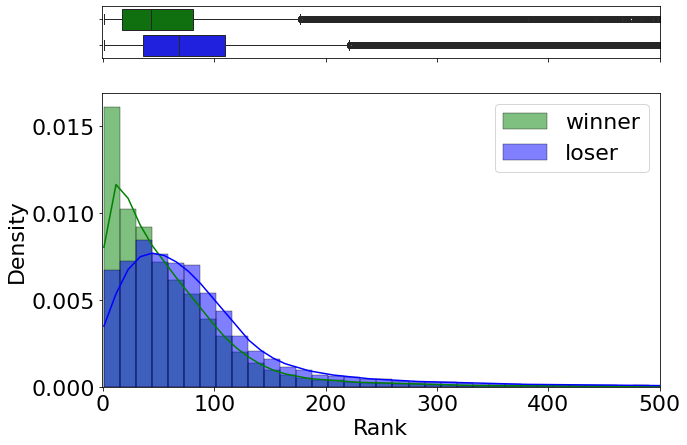

In [37]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sb.boxplot(data[['winner_rank','loser_rank']], orient="h", ax=ax_box,palette={'winner_rank':'green','loser_rank':'blue'}).set(yticklabels=[])

sb.histplot(data['winner_rank'],label='winner',stat='density',kde=True,bins=150,color='green')
sb.histplot(data['loser_rank'],label='loser',stat='density',kde=True,bins=150,color='blue')
plt.xlabel('Rank')
plt.ylabel("Density")
plt.legend()
plt.xlim(-1,500)
plt.savefig(r'img\\EDA\\'+'Rank'+'.pdf',bbox_inches='tight')

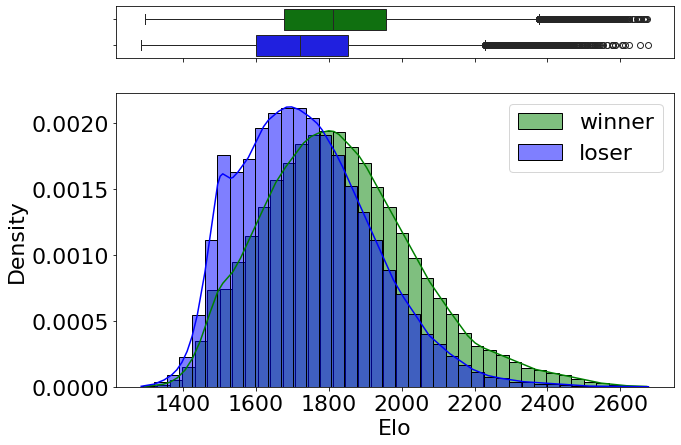

In [49]:
make_plot('winner_elo', 'loser_elo', 'Elo', dis=False)

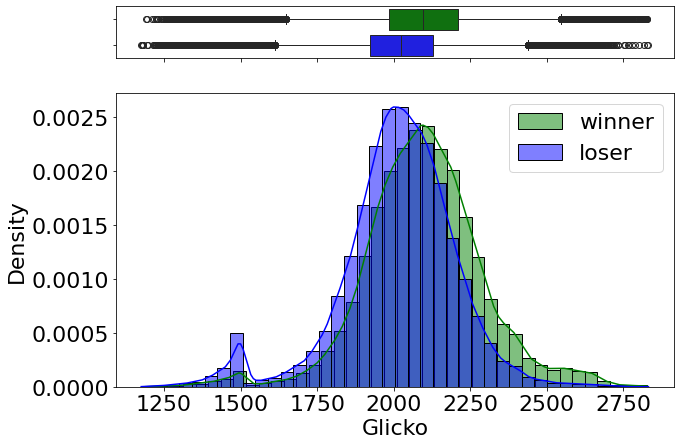

In [50]:
make_plot('winner_glicko', 'loser_glicko', 'Glicko', dis=False)

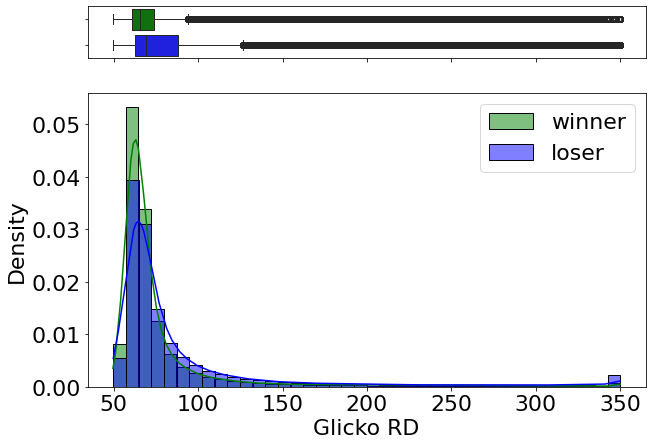

In [51]:
make_plot('winner_RD', 'loser_RD', 'Glicko RD', dis=False)

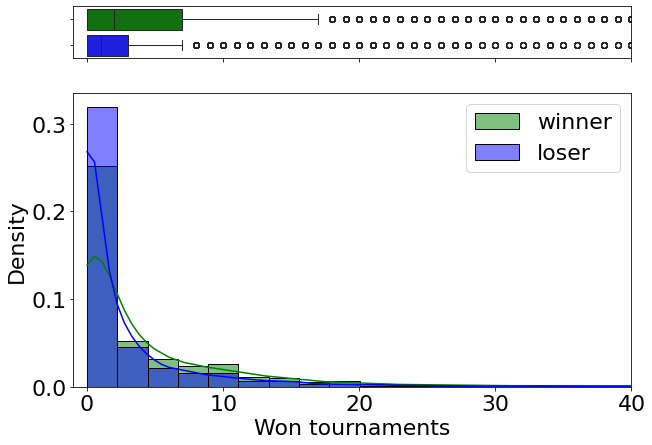

In [38]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sb.boxplot(data[['winner_tournaments_won','loser_tournaments_won']], orient="h", ax=ax_box,palette={'winner_tournaments_won':'green','loser_tournaments_won':'blue'}).set(yticklabels=[])
sb.histplot(data['winner_tournaments_won'],label='winner',stat='density',bins=49,kde=True,color='green')
sb.histplot(data['loser_tournaments_won'],label='loser',stat='density',bins=49,kde=True,color='blue')
plt.xlabel('Won tournaments')
plt.ylabel("Density")
plt.legend()
plt.xlim(-1,40)
plt.savefig(r'img\\EDA\\'+'Won tournaments'+'.pdf',bbox_inches='tight')

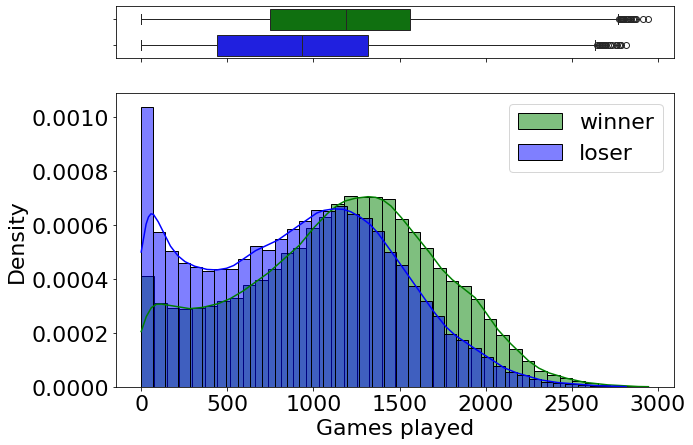

In [52]:
make_plot('winner_games_played', 'loser_games_played', 'Games played', dis=False)

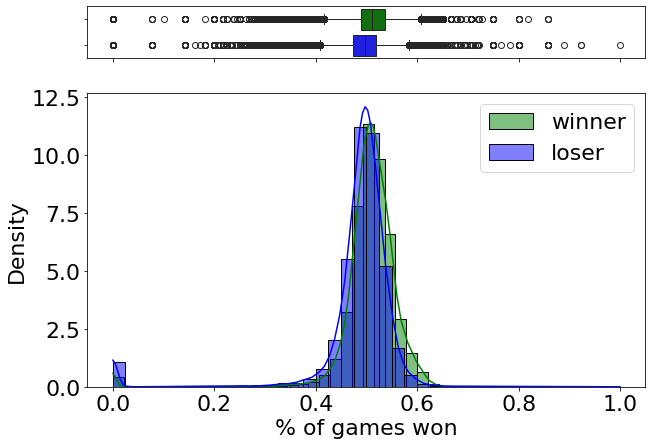

In [53]:
make_plot('winner_games_won', 'loser_games_won', '% of games won', dis=False)

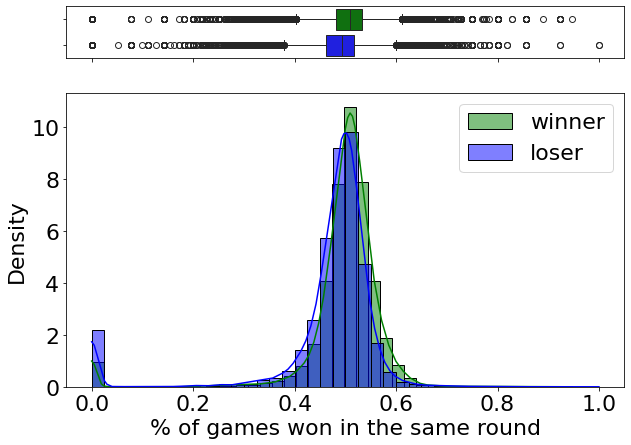

In [54]:
make_plot('winner_games_round_won', 'loser_games_round_won', '% of games won in the same round', dis=False)

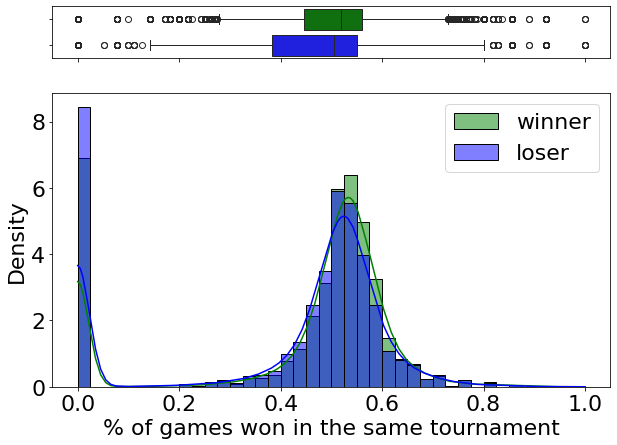

In [55]:
make_plot('winner_games_tourney_won', 'loser_games_tourney_won', '% of games won in the same tournament', dis=False)

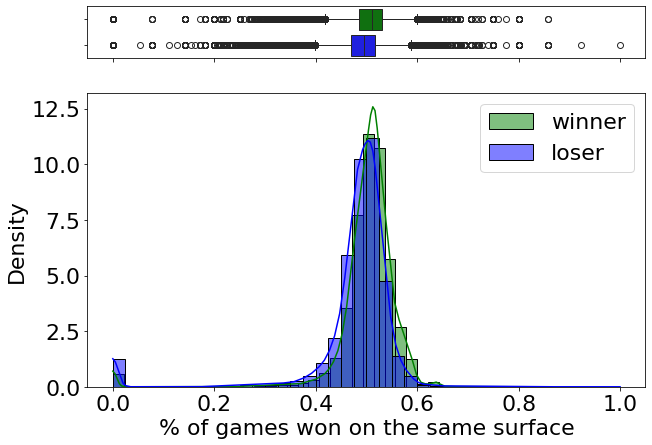

In [56]:
make_plot('winner_games_surface_won', 'loser_games_surface_won', '% of games won on the same surface', dis=False)

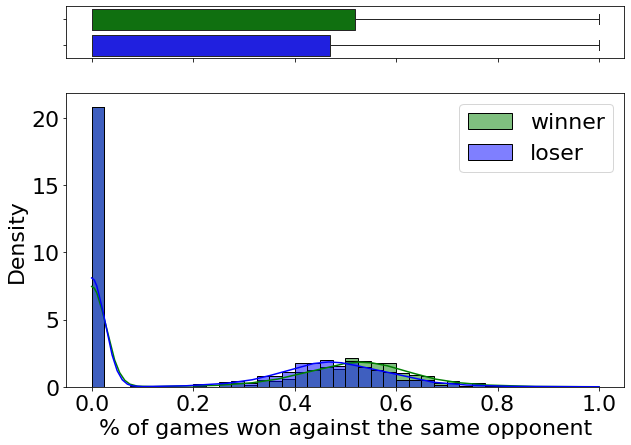

In [57]:
make_plot('winner_games_opponent_won', 'loser_games_opponent_won', '% of games won against the same opponent', dis=False)

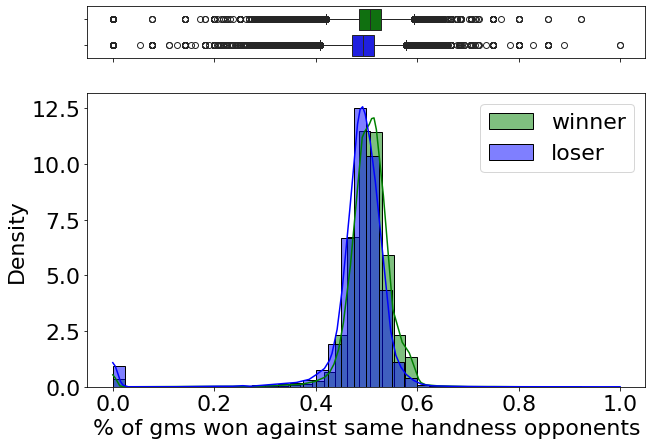

In [58]:
make_plot('winner_games_hand_won', 'loser_games_hand_won', '% of gms won against same handness opponents', dis=False)

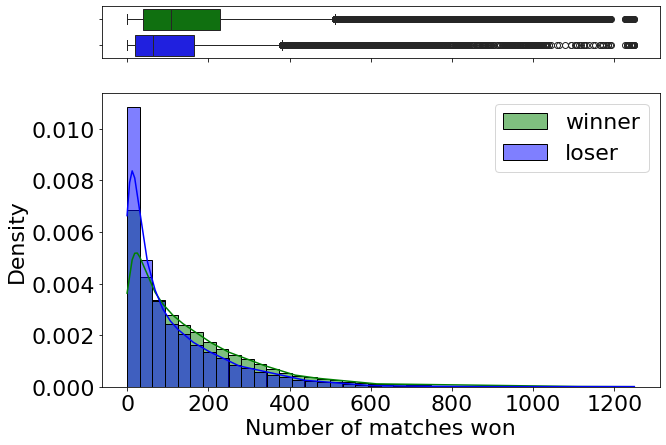

In [59]:
make_plot('winner_matches_won', 'loser_matches_won', 'Number of matches won', dis=False)

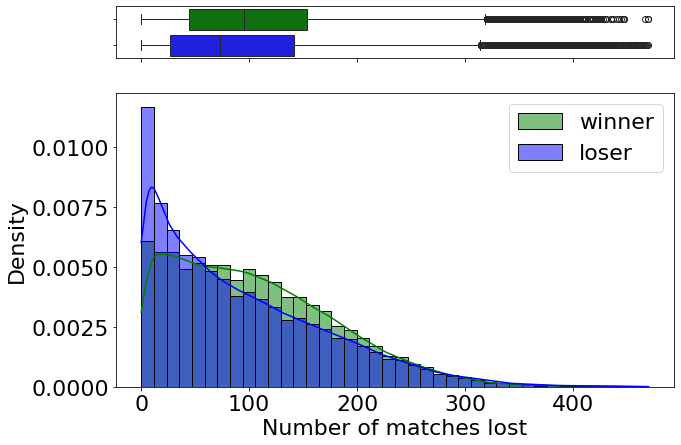

In [60]:
make_plot('winner_matches_lost', 'loser_matches_lost', 'Number of matches lost', dis=False)

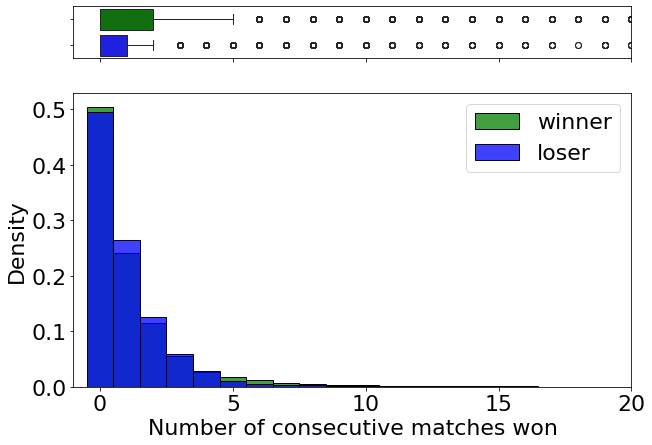

In [39]:
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    sb.boxplot(data[['winner_consecutive_matches_won','loser_consecutive_matches_won']], orient="h", ax=ax_box,palette={'winner_consecutive_matches_won':'green','loser_consecutive_matches_won':'blue'}).set(yticklabels=[])
    sb.histplot(data['winner_consecutive_matches_won'],discrete=True,label='winner',stat='density',bins=40,color='green')
    sb.histplot(data['loser_consecutive_matches_won'],discrete=True,label='loser',stat='density',bins=40,color='blue')
    plt.xlabel('Number of consecutive matches won')
    plt.ylabel("Density")
    plt.legend()
    plt.xlim(-1,20)
    plt.savefig(r'img\\EDA\\'+'Number of consecutive matches won'+'.pdf',bbox_inches='tight')

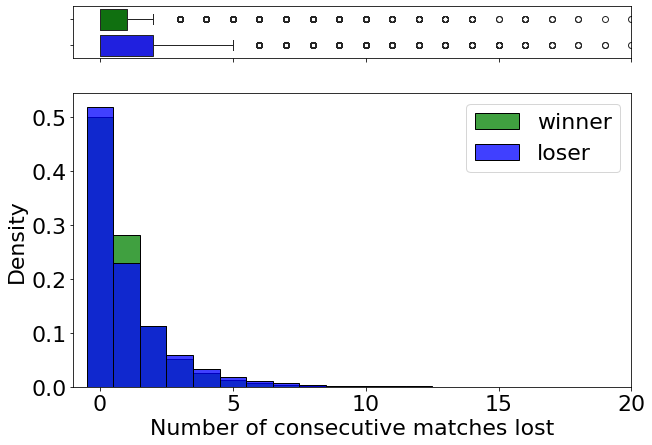

In [40]:
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    sb.boxplot(data[['winner_consecutive_matches_lost','loser_consecutive_matches_lost']], orient="h", ax=ax_box,palette={'winner_consecutive_matches_lost':'green','loser_consecutive_matches_lost':'blue'}).set(yticklabels=[])

    sb.histplot(data['winner_consecutive_matches_lost'],discrete=True,label='winner',stat='density',bins=40,color='green')
    sb.histplot(data['loser_consecutive_matches_lost'],discrete=True,label='loser',stat='density',bins=40,color='blue')
    plt.xlabel('Number of consecutive matches lost')
    plt.ylabel("Density")
    plt.legend()
    plt.xlim(-1,20)
    plt.savefig(r'img\\EDA\\'+'Number of consecutive matches lost'+'.pdf',bbox_inches='tight')

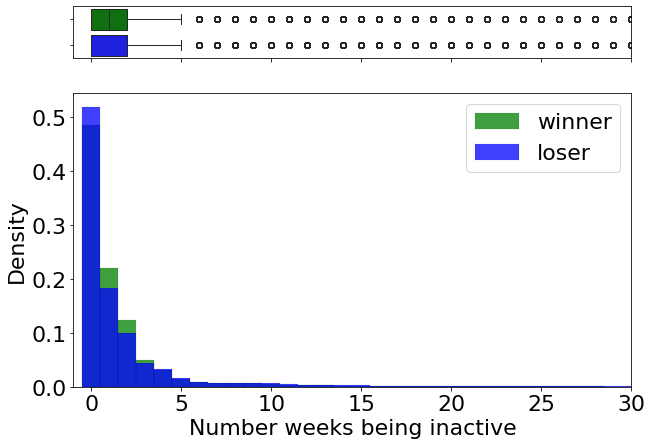

In [41]:
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    sb.boxplot(data[['winner_weeks_inactive','loser_weeks_inactive']], orient="h", ax=ax_box,palette={'winner_weeks_inactive':'green','loser_weeks_inactive':'blue'}).set(yticklabels=[])
    
    sb.histplot(data['winner_weeks_inactive'],discrete=True,label='winner',stat='density',color='green')
    sb.histplot(data['loser_weeks_inactive'],discrete=True,label='loser',stat='density',color='blue')
    plt.xlabel('Number weeks being inactive')
    plt.ylabel("Density")
    plt.legend()
    plt.xlim(-1,30)
    plt.savefig(r'img\\EDA\\'+'Number weeks being inactive'+'.pdf',bbox_inches='tight')

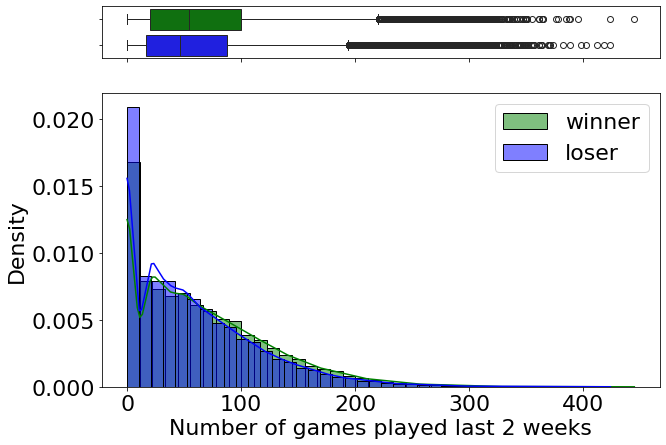

In [61]:
make_plot('winner_games_played_last_weeks', 'loser_games_played_last_weeks', 'Number of games played last 2 weeks', dis=False)

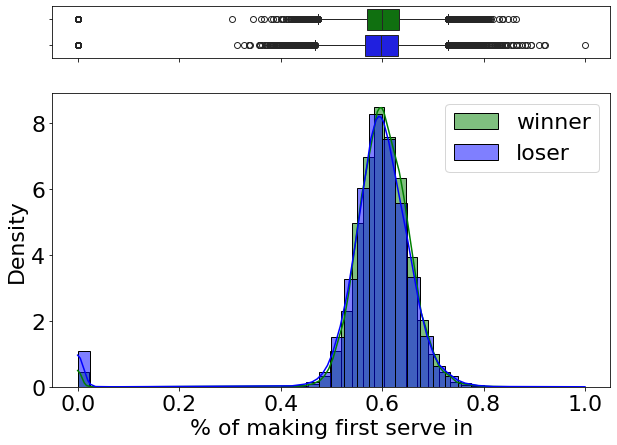

In [62]:
make_plot('winner_first_serve_in', 'loser_first_serve_in', '% of making first serve in', dis=False)

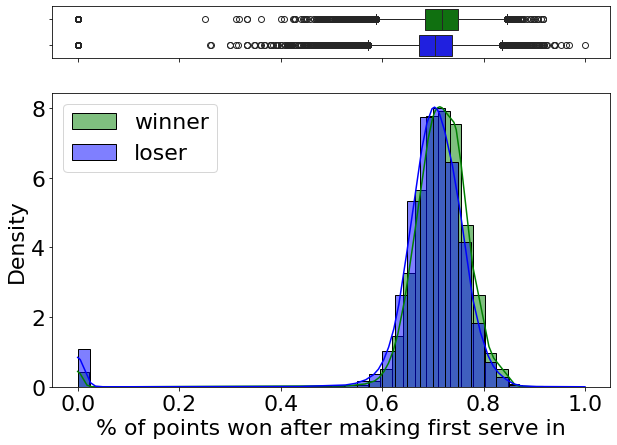

In [63]:
make_plot('winner_first_serve_won', 'loser_first_serve_won', '% of points won after making first serve in', dis=False)

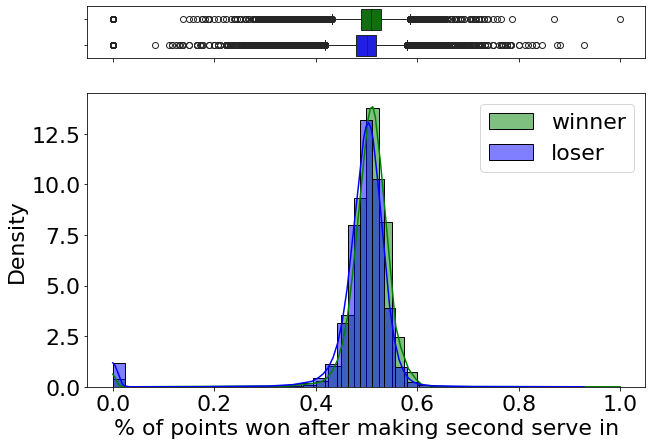

In [64]:
make_plot('winner_second_serve_won', 'loser_second_serve_won', '% of points won after making second serve in', dis=False)

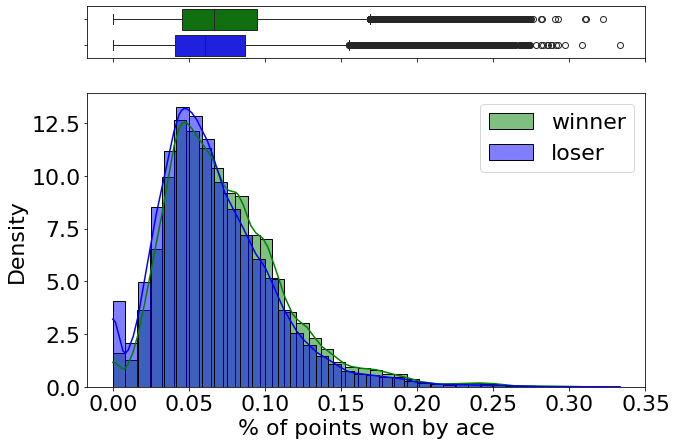

In [65]:
make_plot('winner_aces', 'loser_aces', '% of points won by ace', dis=False)

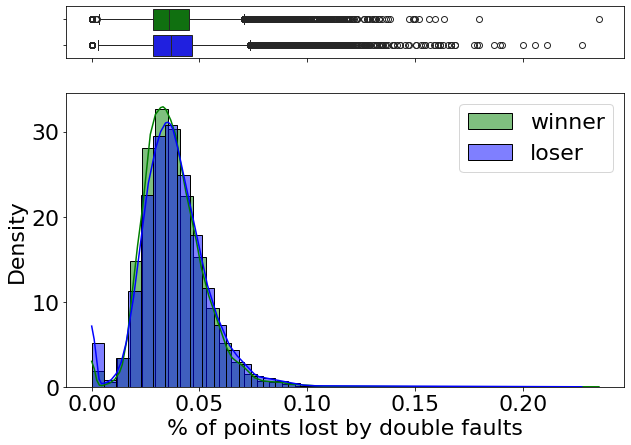

In [66]:
make_plot('winner_double_faults', 'loser_double_faults', '% of points lost by double faults', dis=False)

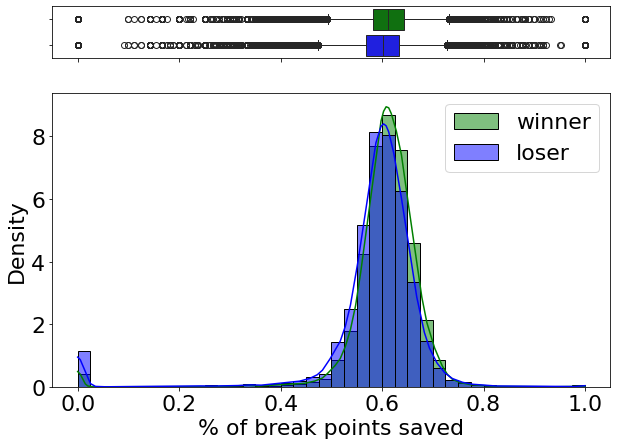

In [67]:
make_plot('winner_break_points_saved', 'loser_break_points_saved', '% of break points saved', dis=False)

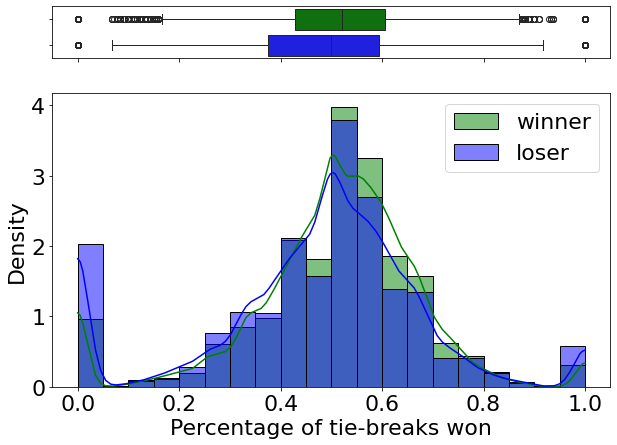

In [42]:
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    sb.boxplot(data[['winner_tiebreaks_won_year','loser_tiebreaks_won_year']], orient="h", ax=ax_box,palette={'winner_tiebreaks_won_year':'green','loser_tiebreaks_won_year':'blue'}).set(yticklabels=[])
    sb.histplot(data['winner_tiebreaks_won_year'],discrete=False,label='winner',stat='density',bins=20,kde=True,color='green')
    sb.histplot(data['loser_tiebreaks_won_year'],discrete=False,label='loser',stat='density',bins=20,kde=True,color='blue')
    plt.xlabel('Percentage of tie-breaks won')
    plt.ylabel("Density")
    plt.legend()
    plt.savefig(r'img\\EDA\\'+'% of tie-breaks won'+'.pdf',bbox_inches='tight')

In [211]:
len(data[data['winner_home']==1]),len(data[data['loser_home']==1])

(10971, 11392)

In [218]:
10971+11392

22363

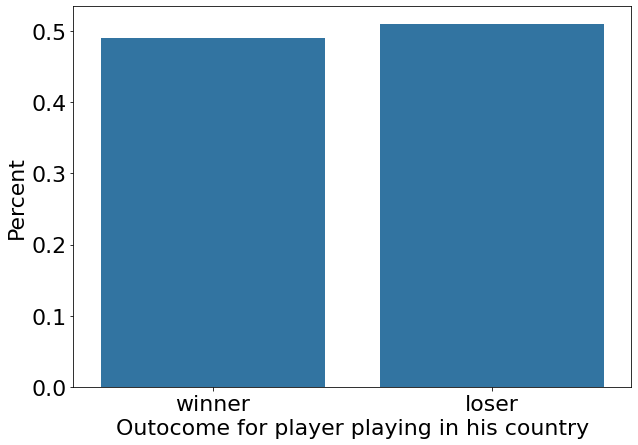

In [68]:
sb.barplot([10971/22363, 11392/22363])

plt.xlabel('Outocome for player playing in his country')
plt.ylabel("Percent")
plt.xticks([0,1],['winner', 'loser'])
plt.savefig(r'img\\EDA\\'+'Player playing in his country'+'.pdf',bbox_inches='tight')

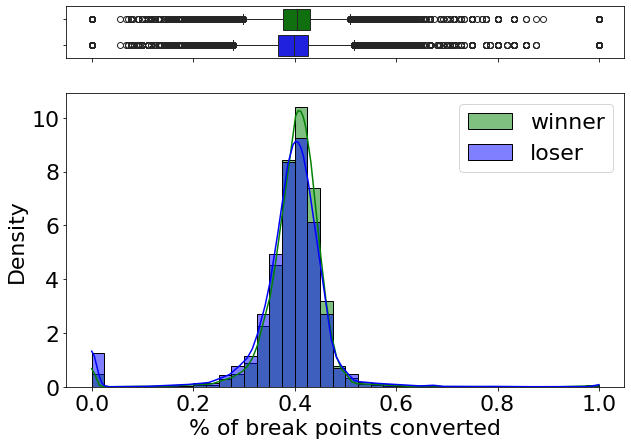

In [69]:
make_plot('winner_break_points_converted', 'loser_break_points_converted', '% of break points converted', dis=False)

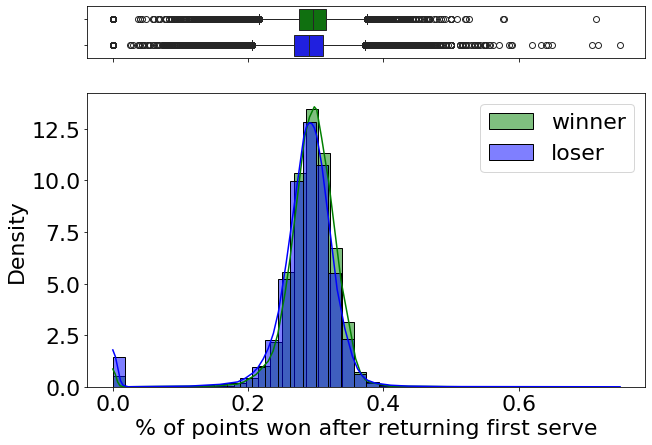

In [70]:
make_plot('winner_first_serve_return_won', 'loser_first_serve_return_won', '% of points won after returning first serve', dis=False)

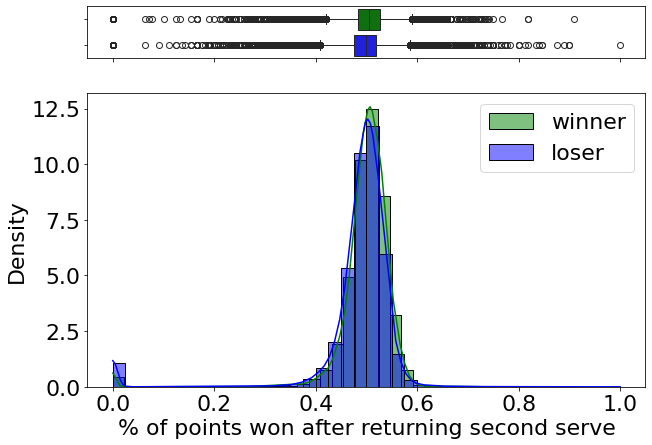

In [71]:
make_plot('winner_second_serve_return_won', 'loser_second_serve_return_won', '% of points won after returning second serve', dis=False)